### Recommender System Step by Step: KNN Item-Based Collaborative Filtering
https://towardsdatascience.com/prototyping-a-recommender-system-step-by-step-part-1-knn-item-based-collaborative-filtering-637969614ea

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
rating_df = pd.read_csv('u.data', sep='\t', names=column_names)
rating_df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [23]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [24]:
df = pd.merge(rating_df,movie_titles, on ="item_id")
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [25]:
df.shape

(100003, 5)

In [26]:
df.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
title        0
dtype: int64

* why i am doing to do this because we are recommended movie based on rating how many person each and every movie rated 

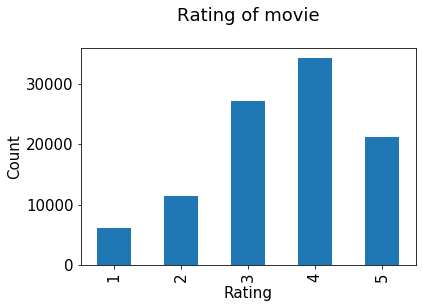

In [29]:
plt.rc("font", size=15)
df.rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating of movie\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('ratingImage.png', bbox_inches='tight')
plt.show()


In [8]:
combine_movie_rating = df.dropna(axis =0, subset=["title"])
movieRatingCount = (combine_movie_rating.
                    groupby(by = ["title"])['rating'].
                    count().reset_index().
                    rename(columns ={"rating":"totalRatingCount"})
                   [['title',"totalRatingCount"]])
movieRatingCount.head()

,title,totalRatingCount
0,'Til There Was You (1997),9
1,1-900 (1994),5
2,101 Dalmatians (1996),109
3,12 Angry Men (1957),125
4,187 (1997),41


In [9]:
rating_col_totalratingCount = combine_movie_rating.merge(movieRatingCount,
                                                         left_on="title",
                                                         right_on='title',
                                                         how = 'left')
rating_col_totalratingCount1= rating_col_totalratingCount.drop(columns=['timestamp'])
rating_col_totalratingCount1.head()

,user_id,item_id,rating,title,totalRatingCount
0,0,50,5,Star Wars (1977),584
1,290,50,5,Star Wars (1977),584
2,79,50,4,Star Wars (1977),584
3,2,50,5,Star Wars (1977),584
4,8,50,5,Star Wars (1977),584


In [10]:
rating_col_totalratingCount1.describe()


,user_id,item_id,rating,totalRatingCount
count,100003.000000,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864,169.105757
std,266.622454,330.797791,1.125704,122.220457
min,0.000000,1.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000,72.000000
50%,447.000000,322.000000,4.000000,146.000000
75%,682.000000,631.000000,4.000000,240.000000
max,943.000000,1682.000000,5.000000,584.000000


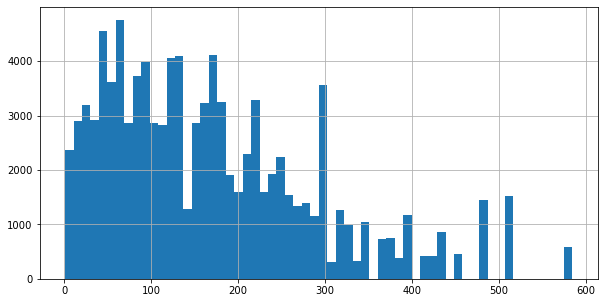

In [11]:
plt.figure(figsize=(10,5))
rating_col_totalratingCount1["totalRatingCount"].hist(bins=60)

In [12]:
pd.set_option('display.float_format',lambda x: "%.3f"%x)
print(movieRatingCount['totalRatingCount'].describe())

count   1664.000
mean      60.098
std       80.963
min        1.000
25%        7.000
50%       27.000
75%       80.250
max      584.000
Name: totalRatingCount, dtype: float64


In [13]:
passable_threshold_rating = 70
rating_popular_movie = rating_col_totalratingCount1.query("totalRatingCount >=@passable_threshold_rating")
rating_popular_movie.head()

,user_id,item_id,rating,title,totalRatingCount
0,0,50,5,Star Wars (1977),584
1,290,50,5,Star Wars (1977),584
2,79,50,4,Star Wars (1977),584
3,2,50,5,Star Wars (1977),584
4,8,50,5,Star Wars (1977),584


In [14]:
rating_popular_movie.shape

(75696, 5)

In [15]:
# create a pivot matrix/table
movie_mat = rating_popular_movie.pivot_table(index='user_id',columns='title',values='rating').fillna(0)
movie_mat.head()

title,101 Dalmatians (1996),12 Angry Men (1957),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Addams Family Values (1993),"Adventures of Priscilla, Queen of the Desert, The (1994)",...,While You Were Sleeping (1995),White Squall (1996),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Wizard of Oz, The (1939)","Wrong Trousers, The (1993)",Young Frankenstein (1974),Young Guns (1988)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,2.000,5.000,0.000,3.000,4.000,0.000,3.000,3.000,0.000,0.000,...,4.000,0.000,0.000,4.000,0.000,0.000,4.000,5.000,5.000,3.000
2,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [16]:
from scipy.sparse import csr_matrix
movieFeaturesDfMatrix = csr_matrix(movie_mat.values)

from sklearn.neighbors import NearestNeighbors

KNN_model = NearestNeighbors(metric="cosine",algorithm='brute')
KNN_model.fit(movieFeaturesDfMatrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [17]:
movie_mat.shape

(944, 466)

In [18]:

query_index = np.random.choice(movie_mat.shape[0])
print(query_index)
distances, indices = KNN_model.kneighbors(movie_mat.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 5)

433


In [19]:
movie_mat.head()

title,101 Dalmatians (1996),12 Angry Men (1957),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Addams Family Values (1993),"Adventures of Priscilla, Queen of the Desert, The (1994)",...,While You Were Sleeping (1995),White Squall (1996),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Wizard of Oz, The (1939)","Wrong Trousers, The (1993)",Young Frankenstein (1974),Young Guns (1988)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,2.000,5.000,0.000,3.000,4.000,0.000,3.000,3.000,0.000,0.000,...,4.000,0.000,0.000,4.000,0.000,0.000,4.000,5.000,5.000,3.000
2,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [20]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f'Recommendations for {movie_mat.index[query_index]}:\n')
    else:
        print(f'{i}: {movie_mat.index[indices.flatten()[i]]}, with distance of {distances.flatten()[i]}:')

Recommendations for 433:

1: 329, with distance of 0.5635466098037504:
2: 431, with distance of 0.5785227360840033:
3: 29, with distance of 0.5824030546328168:
4: 149, with distance of 0.6132342765916281:
